## Observations and Insights 

In [2]:
#Three inferences from the Results
#1.Ramicane and Capomulin are similar in effectiveness, the miajority of the mice got cured.
#2. The weight and the Tumor volume are strongly, positively coorelated, if the weight increases the tumor volume of also increases
#3. only the drug Infubinol had a outlier.

In [19]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

mouse_metadata.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [20]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [21]:
# Combine the data into a single dataset
mouse_study_df = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])
mouse_study_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [22]:
# Checking the number of mice in the DataFrame.
print(len(mouse_metadata['Mouse ID']),len(study_results), len(mouse_study_df) )


249 1893 1893


In [23]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_study_gpby  = mouse_study_df.groupby(['Mouse ID'])["Timepoint"].count()
new_df = pd.DataFrame(mouse_study_gpby)
print(new_df['Timepoint'].max())


13


In [24]:
count_TP10 =new_df.loc[new_df['Timepoint']>10]
count_TP10

,Timepoint
Mouse ID,
g989,13


In [93]:
# Optional: Get all the data for the duplicate mouse ID
new_df_duplicate = mouse_study_df.loc[mouse_study_df["Mouse ID"] == "g989", :]
new_df_duplicate.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0


In [94]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df1 = mouse_study_df.copy()
clean_df = clean_df1.drop([clean_df1.index[908],clean_df1.index[909],clean_df1.index[910],clean_df1.index[911],clean_df1.index[912],clean_df1.index[913],clean_df1.index[914],clean_df1.index[915],clean_df1.index[916],clean_df1.index[917],clean_df1.index[918],clean_df1.index[919],clean_df1.index[920]])
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [37]:
# Checking the number of mice in the clean DataFrame.
print(len(clean_df))

1880


## Summary Statistics

In [104]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#a copy of the file is created
copyclean_df=clean_df.copy()
#grouped b Drug Regimen
grouped_copyclean_df = copyclean_df.groupby(['Drug Regimen'])
# a Dataframe is created
reg_df= pd.DataFrame(grouped_copyclean_df["Tumor Volume (mm3)"].mean())
reg_df['Mean']= pd.DataFrame(grouped_copyclean_df["Tumor Volume (mm3)"].mean())
reg_df['Median']= pd.DataFrame(grouped_copyclean_df["Tumor Volume (mm3)"].median())
reg_df['Variance']= pd.DataFrame(grouped_copyclean_df["Tumor Volume (mm3)"].var())
reg_df['Standard deviation']= pd.DataFrame(grouped_copyclean_df["Tumor Volume (mm3)"].std())
reg_df['SEM']= pd.DataFrame(grouped_copyclean_df["Tumor Volume (mm3)"].sem())
reg_df['Total mice/time']= pd.DataFrame(grouped_copyclean_df["Tumor Volume (mm3)"].count())
del reg_df['Tumor Volume (mm3)']
reg_df.head(10)


,Mean,Median,Variance,Standard deviation,SEM,Total mice/time
Drug Regimen,,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346,230
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821,178
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236,178
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860,188
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466,186
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331,181
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332,148
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955,228
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111,181


In [96]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
copyclean1_df =  clean_df.copy()
grouped_copyclean1_df= copyclean1_df.groupby(['Drug Regimen'])
grouped_copyclean1_df
reg_agg_df= grouped_copyclean1_df.agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
reg_agg_df["Total mice/time"] = copyclean1_df.groupby(['Drug Regimen'])["Mouse ID"].count()
reg_agg_df.reset_index(inplace=True)
reg_agg_df.head()
# This method produces everything in a single groupby function

Drug Regimen Tumor Volume (mm3)                                            \
                             mean     median        var       std       sem   
0    Capomulin          40.675741  41.557809  24.947764  4.994774  0.329346   
1     Ceftamin          52.591172  51.776157  39.290177  6.268188  0.469821   
2    Infubinol          52.884795  51.820584  43.128684  6.567243  0.492236   
3     Ketapril          55.235638  53.698743  68.553577  8.279709  0.603860   
4     Naftisol          54.331565  52.509285  66.173479  8.134708  0.596466   

  Total mice/time  
                   
0             230  
1             178  
2             178  
3             188  
4             186

## Bar Plots

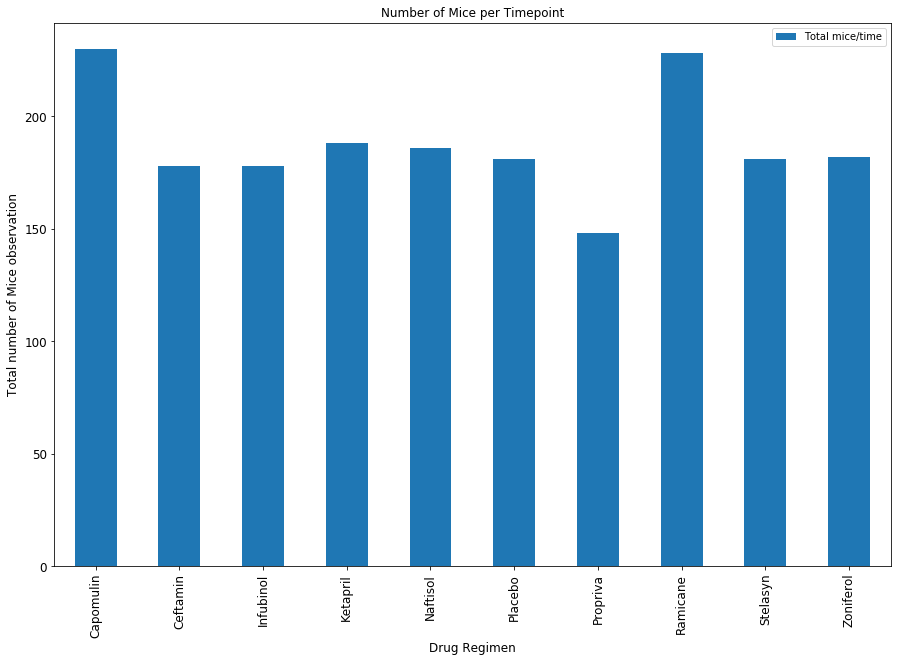

In [99]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
pd_bar= reg_df[['Total mice/time']].plot(kind='bar', title ="Number of Mice per Timepoint", figsize=(15, 10), legend=True, fontsize=12)
pd_bar.set_xlabel("Drug Regimen", fontsize=12)
pd_bar.set_ylabel("Total number of Mice observation", fontsize=12)
plt.show()



x_axis = np.arange(len(reg_agg_df))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations,reg_agg_df.iloc[:,0]) #(location of the tick, name in the tick)

plt.bar(x_axis, reg_agg_df.iloc[:,6], color="b",alpha=.8,
        align="center", width=.7, bottom=None)  #plt bar(locations of the bars, bar height)
plt.tight_layout()


#plt.show()

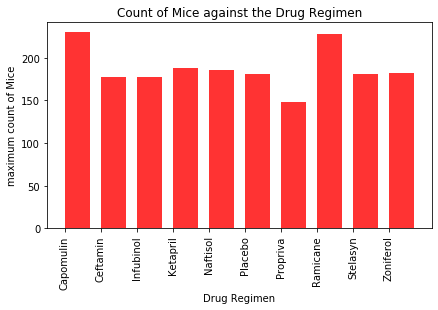

In [103]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

x_axis = np.arange(len(reg_agg_df))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations,reg_agg_df.iloc[:,0]) #(location of the tick, name in the tick)

plt.bar(x_axis, reg_agg_df.iloc[:,6], color="r",alpha=.8,
        align="edge", width=.7, bottom=None)  #plt bar(locations of the bars, bar height)

plt.xticks(rotation=90)
plt.tight_layout()
plt.xlabel("Drug Regimen")
plt.ylabel("maximum count of Mice")
plt.title("Count of Mice against the Drug Regimen")
plt.show()

## Pie Plots

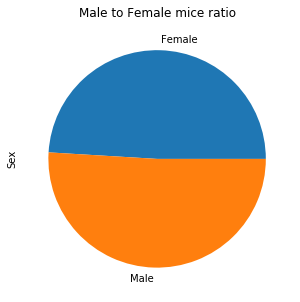

In [90]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

mf_sums = clean_df.Sex.groupby(clean_df.Sex).count()
pd_pie= mf_sums.plot(kind='pie', y="mf_sums", figsize=(5, 5), title="Male to Female mice ratio")
plt.show()

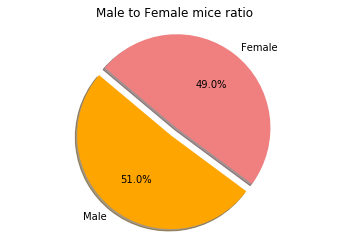

In [89]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mf_count=len(clean_df[(clean_df['Sex']=='Male')]),len(clean_df[(clean_df['Sex']=='Female')])

# Labels for the sections of our pie chart
labels= clean_df['Sex'].unique() 

# The values of each section of the pie chart
sizes = mf_count

# The colors of each section of the pie chart
colors = ["orange", "lightcoral"]

# Tells matplotlib to seperate the "Humans" section from the others
explode = (0.1, 0)

plt.pie(mf_count, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("Male to Female mice ratio")
plt.axis("equal")
plt.show()


## Quartiles, Outliers and Boxplots

In [51]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

max_gpby_df= clean_df.groupby(['Mouse ID'])["Timepoint"].max()
max_df= pd.DataFrame(max_gpby_df)
qob_df= pd.merge(clean_df, max_gpby_df, how="right", on=["Mouse ID", "Timepoint"])

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [81]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    # add subset 
    
    # Determine outliers using upper and lower bounds
    
drugs=['Capomulin', 'Ramicane','Infubinol', 'Ceftamin']
tu_vol=[]
for drug in drugs:
    volume= qob_df.loc[qob_df["Drug Regimen"]== drug, "Tumor Volume (mm3)"]
    tu_vol.append(volume)
    quar= volume.quantile([0.25, 0.5, 0.75])
    low_b=quar[0.25]
    up_b=quar[0.75]
    iqr=up_b-low_b
    up_outliers= up_b+1.5*iqr
    low_outliers= low_b-1.5*iqr


{'whiskers': [<matplotlib.lines.Line2D at 0x1f3f64252e8>,
 'caps': [<matplotlib.lines.Line2D at 0x1f3f64259b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f3f6425198>,
 'medians': [<matplotlib.lines.Line2D at 0x1f3f642e080>,
 'fliers': [<matplotlib.lines.Line2D at 0x1f3f642e3c8>,
 'means': []}

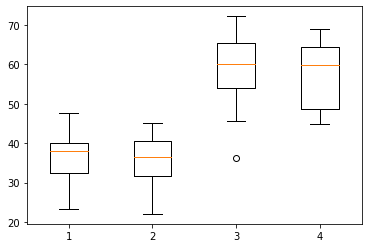

In [56]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tu_vol)

## Line and Scatter Plots

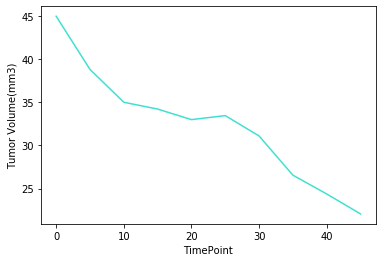

In [79]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

a= clean_df.loc[clean_df["Mouse ID"]== 'k403']
plt.plot(a['Timepoint'], a['Tumor Volume (mm3)'], color="turquoise")
plt.xlabel("TimePoint")
plt.ylabel("Tumor Volume(mm3)")
plt.show()


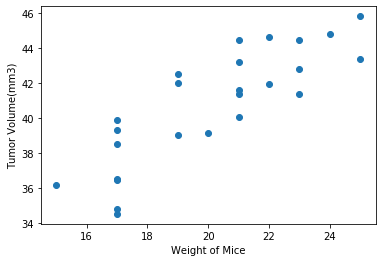

In [80]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
b= clean_df.loc[clean_df["Drug Regimen"]== 'Capomulin']
#print(b)
avg= b.groupby(["Mouse ID"]).mean()
plt.scatter(avg['Weight (g)'], avg["Tumor Volume (mm3)"])
plt.xlabel("Weight of Mice")
plt.ylabel("Tumor Volume(mm3)")
plt.show()


## Correlation and Regression

In [59]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
cor= st.pearsonr(avg['Weight (g)'], avg["Tumor Volume (mm3)"])
cor

(0.8419363424694717, 1.322572243471279e-07)

In [70]:
(slope, intercept, rvalue, pvalue, stderr)= st.linregress(avg['Weight (g)'], avg["Tumor Volume (mm3)"])

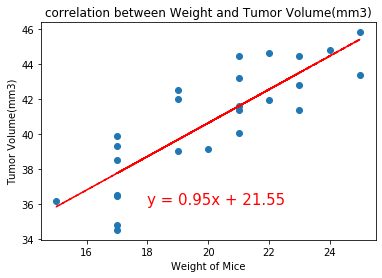

In [77]:
plt.scatter(avg['Weight (g)'], avg["Tumor Volume (mm3)"])
y= avg['Weight (g)']*slope + intercept
plt.plot(avg['Weight (g)'],y, "--r")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(18,36),fontsize=15,color="red")
plt.xlabel("Weight of Mice")
plt.ylabel("Tumor Volume(mm3)")
plt.title("correlation between Weight and Tumor Volume(mm3)")
plt.show()

